In [114]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [115]:
# Define categorical features
categorical_features = ["transmission", "fuelType", "engineSize"]
ordinal_features = ["model", "brand", "year", "mileage", "mpg"]
# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_features),
        ("ord", OrdinalEncoder(), ordinal_features)
    ])

In [117]:
# Load your dataset
data = pd.read_csv("./samletdata.csv", sep=";")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Split data into features (X) and target variable (y)
print(data.drop(["price", "tax"], axis=1))
X = preprocessor.fit_transform(data.drop(["price", "tax"], axis=1))
with(open("preprocessor.pkl", "wb")) as f:
    pkl.dump(preprocessor, f)

# X = data.drop(["price", "tax"], axis=1)
y = data['price']

colors = {"model": "tab:blue", "year": "tab:orange", "transmission": "tab:green", "mileage": "tab:red", "fuelType": "tab:purple", "mpg": "tab:brown", "engineSize": "tab:pink", "brand": "tab:gray"}

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
print(X)

      model  year transmission  mileage fuelType   mpg engineSize brand
0        A1  2017       Manual    15735   Petrol  55,4        1,4  audi
1        A6  2016    Automatic    36203   Diesel  64,2        2,0  audi
2        A1  2016       Manual    29946   Petrol  55,4        1,4  audi
3        A4  2017    Automatic    25952   Diesel  67,3        2,0  audi
4        A3  2019       Manual     1998   Petrol  49,6        1,0  audi
...     ...   ...          ...      ...      ...   ...        ...   ...
99182   Eos  2012       Manual    74000   Diesel  58,9        2,0    vw
99183   Fox  2008       Manual    88102   Petrol  46,3        1,2    vw
99184   Fox  2009       Manual    70000   Petrol  42,0        1,4    vw
99185   Fox  2006       Manual    82704   Petrol  46,3        1,2    vw
99186   Fox  2007       Manual    74000   Petrol  46,3        1,2    vw

[99187 rows x 8 columns]
  (0, 1)	1.0
  (0, 8)	1.0
  (0, 15)	1.0
  (0, 49)	9.0
  (0, 51)	22.0
  (0, 52)	13787.0
  (0, 53)	165.0
  (1, 0

ValueError: x and y must be the same size

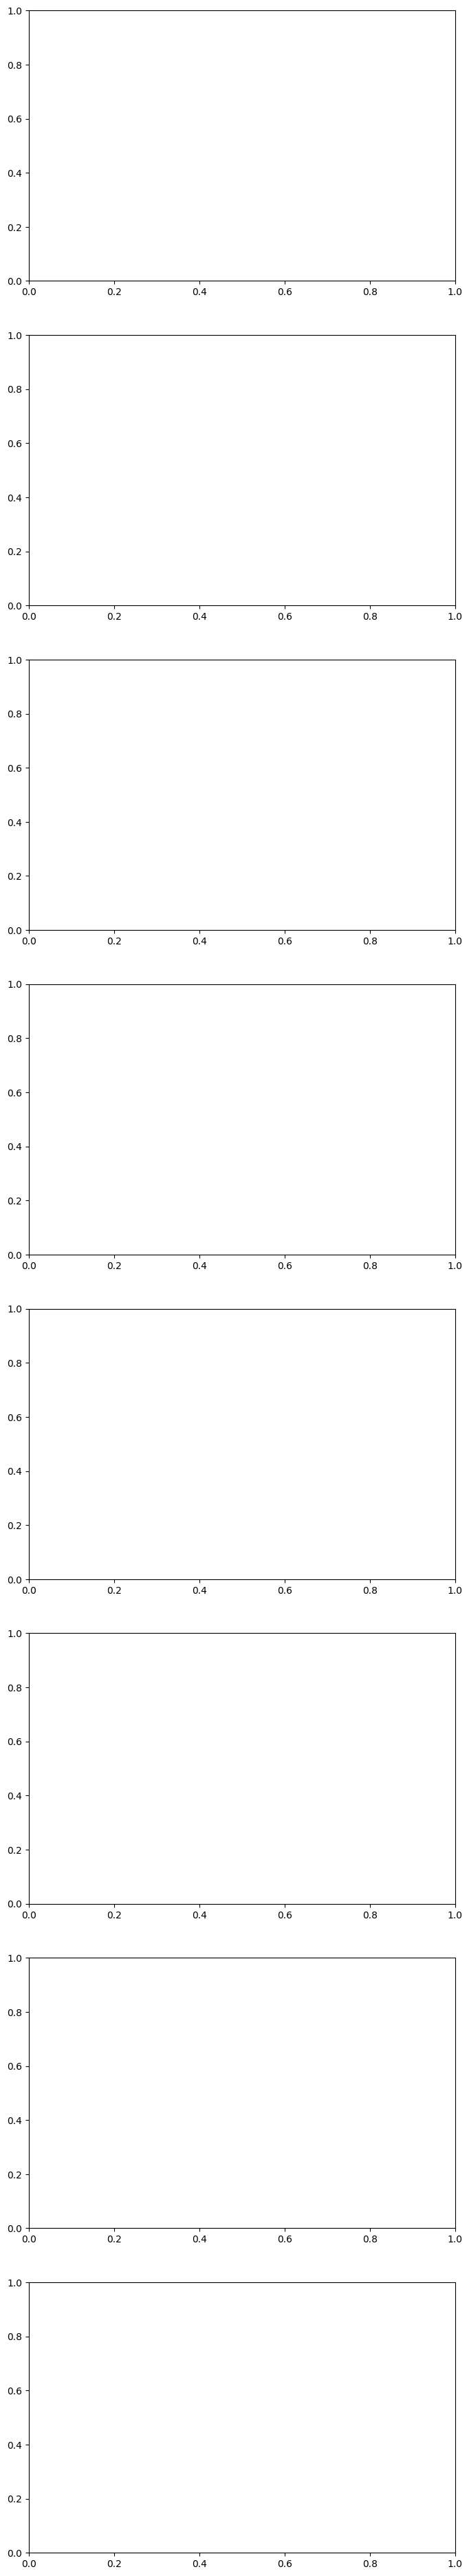

In [113]:
# Create individual subplots for each feature
fig, axs = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 6 * len(features)))

# Iterate over each feature and create scatterplot
for i, col in enumerate(features):
    axs[i].scatter(X[:, i], y, c=colors[col])
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Append linear regression model to pipeline
model = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('scalar', StandardScaler(with_mean=False)),
    ('poly', PolynomialFeatures(degree=4)),
    ('regressor', Ridge())
], verbose=True)

# Train the model
model.fit(X_train, y_train)


[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.1s
[Pipeline] .............. (step 2 of 3) Processing poly, total=   4.5s
[Pipeline] ......... (step 3 of 3) Processing regressor, total=   5.5s


Pipeline(steps=[('scalar', StandardScaler(with_mean=False)),
                ('poly', PolynomialFeatures(degree=4)),
                ('regressor', Ridge())],
         verbose=True)

In [ ]:
# Score the model
score = model.score(X_test, y_test)

print("Model R-squared (R2) Score:", score)

Model R-squared (R2) Score: 0.897289617277376


# testede $r^2$ på polynomisk lineært
- audi: 0.64
- bmw:  0.61
- ford: 0.46
- hyundai: 0.67
- mercedes: 0.40
- skoda: 0.78
- toyota: 0.79
- vauxhall: 0.45
- vw: 0.64

In [ ]:
dinmor = {col: [data,] for col, data in zip(features, ["Corolla", "1999", "Manual", "300000", "Petrol", "30", "1,8", "toyota"])}

dinmor = pd.DataFrame(dinmor)

dinmor = preprocessor.transform(dinmor)
print(dinmor)

ValueError: Found unknown categories ['Corolla'] in column 0 during transform